In [1]:
# Melakukan impor libraries yang diperlukan untuk EDA
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from folium.plugins import HeatMap
from collections import Counter
plt.style.use('bmh'); sns.set()

In [2]:
train = pd.read_csv('../input/bdc-sd2021-data-tambahan/train_facial_relative.csv')
test = pd.read_csv('../input/bdc-sd2021-data-tambahan/test_facial_relative.csv')
target = pd.read_csv('../input/bdc-sd2021-data-tambahan/train_target_and_fold.csv')[['usia']]

In [3]:
train

,x_le,y_le,x_re,y_re,x_n,y_n,x_ml,y_ml,x_mr,y_mr,...,adj_n_ml,sym_le_mr,adj_le_mr,sym_re_mr,adj_re_mr,sym_n_mr,adj_n_mr,sym_ml_mr,adj_ml_mr,abs_angle
0,0.204545,0.390411,0.698052,0.392694,0.405844,0.618721,0.194805,0.712329,0.733766,0.705479,...,0.249515,0.615908,0.693416,0.314818,0.446237,0.339205,0.350364,0.539005,0.539049,0.061566
1,0.179724,0.397351,0.589862,0.403974,0.290323,0.619205,0.202765,0.725166,0.635945,0.728477,...,0.171500,0.563722,0.648461,0.327759,0.453958,0.362484,0.377599,0.433192,0.433204,0.134023
2,0.195946,0.404878,0.662162,0.404878,0.378378,0.614634,0.202703,0.731707,0.682432,0.731707,...,0.239078,0.586077,0.664537,0.327457,0.453156,0.325814,0.344595,0.479730,0.479730,0.174672
3,0.266055,0.373239,0.715596,0.373239,0.440367,0.549296,0.238532,0.690141,0.724771,0.704225,...,0.272772,0.565660,0.629561,0.331113,0.431290,0.323865,0.348745,0.486442,0.486585,0.121842
4,0.244565,0.389764,0.695652,0.393701,0.413043,0.578740,0.217391,0.696850,0.706522,0.712598,...,0.254682,0.563583,0.641880,0.319083,0.440352,0.322564,0.346806,0.489384,0.489613,0.012195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,0.196911,0.401146,0.637066,0.383954,0.339768,0.616046,0.262548,0.759312,0.610039,0.753582,...,0.207921,0.543033,0.629450,0.370614,0.498802,0.303253,0.327708,0.347538,0.347576,0.540420
2301,0.255892,0.386256,0.767677,0.398104,0.484848,0.649289,0.282828,0.772512,0.686869,0.779621,...,0.267332,0.583504,0.705787,0.389981,0.548077,0.240413,0.274054,0.404103,0.404167,0.552494
2302,0.240838,0.400372,0.725131,0.396648,0.476440,0.616387,0.314136,0.780261,0.675393,0.780261,...,0.281800,0.577194,0.688497,0.386824,0.541556,0.257753,0.304386,0.361257,0.361257,0.162489
2303,0.198381,0.405836,0.676113,0.413793,0.331984,0.631300,0.214575,0.801061,0.574899,0.814324,...,0.284469,0.555543,0.728351,0.413121,0.619658,0.304147,0.370196,0.360568,0.360892,0.456213


In [4]:
train.columns

Index(['x_le', 'y_le', 'x_re', 'y_re', 'x_n', 'y_n', 'x_ml', 'y_ml', 'x_mr',
       'y_mr', 'wh_ratio', 'adj_y_le', 'adj_y_re', 'adj_y_n', 'adj_y_ml',
       'adj_y_mr', 'sym_le_re', 'adj_le_re', 'sym_le_n', 'adj_le_n',
       'sym_re_n', 'adj_re_n', 'sym_le_ml', 'adj_le_ml', 'sym_re_ml',
       'adj_re_ml', 'sym_n_ml', 'adj_n_ml', 'sym_le_mr', 'adj_le_mr',
       'sym_re_mr', 'adj_re_mr', 'sym_n_mr', 'adj_n_mr', 'sym_ml_mr',
       'adj_ml_mr', 'abs_angle'],
      dtype='object')

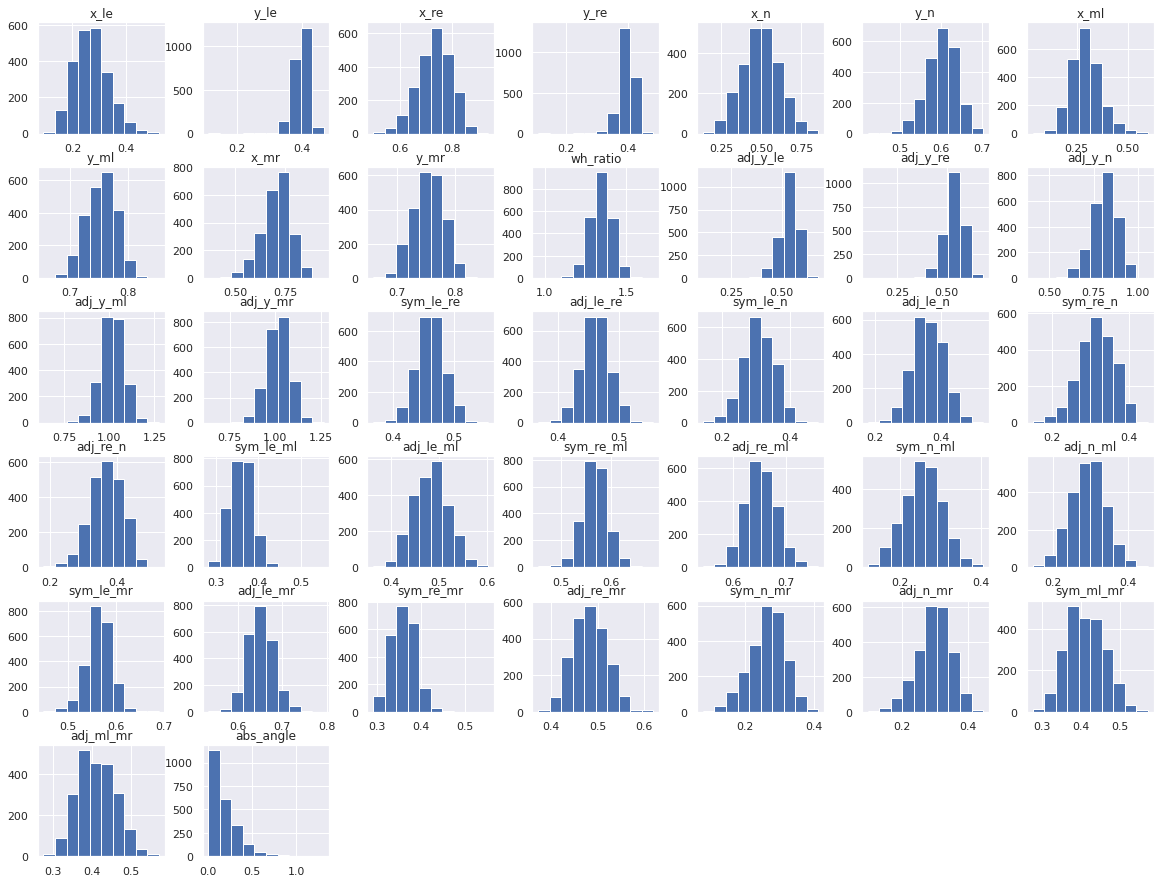

In [5]:
#Melihat distribusi persebaran setiap variabel pada data train
numerical = train.select_dtypes(include = ['float64']).columns

train[numerical].hist(figsize=(20, 18), layout=(7, 7));

In [6]:
test

,x_le,y_le,x_re,y_re,x_n,y_n,x_ml,y_ml,x_mr,y_mr,...,adj_n_ml,sym_le_mr,adj_le_mr,sym_re_mr,adj_re_mr,sym_n_mr,adj_n_mr,sym_ml_mr,adj_ml_mr,abs_angle
0,0.291209,0.333333,0.758242,0.338028,0.521978,0.516432,0.296703,0.732394,0.730769,0.737089,...,0.338570,0.596852,0.645365,0.400006,0.467840,0.303782,0.332088,0.434091,0.434101,0.070471
1,0.281690,0.405128,0.753521,0.394872,0.549296,0.625641,0.260563,0.723077,0.746479,0.707692,...,0.318229,0.554593,0.623428,0.312900,0.429635,0.213573,0.227106,0.486159,0.486375,0.029403
2,0.214533,0.403023,0.660900,0.397985,0.366782,0.612091,0.235294,0.727960,0.692042,0.722922,...,0.206456,0.574761,0.648943,0.326426,0.447452,0.343624,0.359129,0.456775,0.456800,0.022553
3,0.365517,0.391753,0.779310,0.402062,0.648276,0.597938,0.393103,0.773196,0.758621,0.757732,...,0.346547,0.537095,0.627927,0.356271,0.476312,0.194191,0.240590,0.365844,0.366102,0.064427
4,0.265625,0.381323,0.734375,0.369650,0.500000,0.603113,0.296875,0.747082,0.718750,0.735409,...,0.279993,0.575064,0.655712,0.366092,0.489833,0.255644,0.281443,0.422036,0.422164,0.044914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.356364,0.398892,0.821818,0.398892,0.650909,0.617729,0.374545,0.739612,0.785455,0.736842,...,0.319338,0.546195,0.617197,0.339901,0.445124,0.179696,0.206282,0.410918,0.410925,0.124355
986,0.274725,0.380952,0.758242,0.373016,0.582418,0.563492,0.362637,0.777778,0.747253,0.753968,...,0.369237,0.602016,0.700027,0.381111,0.527587,0.251896,0.311010,0.385352,0.386026,0.047583
987,0.289855,0.373737,0.753623,0.383838,0.521739,0.585859,0.275362,0.737374,0.724638,0.747475,...,0.328573,0.573337,0.690348,0.364790,0.522544,0.259399,0.308120,0.449389,0.449509,0.031240
988,0.142857,0.338403,0.614286,0.338403,0.319048,0.593156,0.200000,0.779468,0.557143,0.779468,...,0.261948,0.605120,0.690476,0.444751,0.555329,0.302327,0.333367,0.357143,0.357143,0.020199


In [7]:
target

,usia
0,27
1,27
2,27
3,24
4,24
...,...
2300,23
2301,23
2302,27
2303,27


In [8]:
#menggabungkan data train dan target
train_new = pd.concat([train, target], axis = 1)
train_new

,x_le,y_le,x_re,y_re,x_n,y_n,x_ml,y_ml,x_mr,y_mr,...,sym_le_mr,adj_le_mr,sym_re_mr,adj_re_mr,sym_n_mr,adj_n_mr,sym_ml_mr,adj_ml_mr,abs_angle,usia
0,0.204545,0.390411,0.698052,0.392694,0.405844,0.618721,0.194805,0.712329,0.733766,0.705479,...,0.615908,0.693416,0.314818,0.446237,0.339205,0.350364,0.539005,0.539049,0.061566,27
1,0.179724,0.397351,0.589862,0.403974,0.290323,0.619205,0.202765,0.725166,0.635945,0.728477,...,0.563722,0.648461,0.327759,0.453958,0.362484,0.377599,0.433192,0.433204,0.134023,27
2,0.195946,0.404878,0.662162,0.404878,0.378378,0.614634,0.202703,0.731707,0.682432,0.731707,...,0.586077,0.664537,0.327457,0.453156,0.325814,0.344595,0.479730,0.479730,0.174672,27
3,0.266055,0.373239,0.715596,0.373239,0.440367,0.549296,0.238532,0.690141,0.724771,0.704225,...,0.565660,0.629561,0.331113,0.431290,0.323865,0.348745,0.486442,0.486585,0.121842,24
4,0.244565,0.389764,0.695652,0.393701,0.413043,0.578740,0.217391,0.696850,0.706522,0.712598,...,0.563583,0.641880,0.319083,0.440352,0.322564,0.346806,0.489384,0.489613,0.012195,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,0.196911,0.401146,0.637066,0.383954,0.339768,0.616046,0.262548,0.759312,0.610039,0.753582,...,0.543033,0.629450,0.370614,0.498802,0.303253,0.327708,0.347538,0.347576,0.540420,23
2301,0.255892,0.386256,0.767677,0.398104,0.484848,0.649289,0.282828,0.772512,0.686869,0.779621,...,0.583504,0.705787,0.389981,0.548077,0.240413,0.274054,0.404103,0.404167,0.552494,23
2302,0.240838,0.400372,0.725131,0.396648,0.476440,0.616387,0.314136,0.780261,0.675393,0.780261,...,0.577194,0.688497,0.386824,0.541556,0.257753,0.304386,0.361257,0.361257,0.162489,27
2303,0.198381,0.405836,0.676113,0.413793,0.331984,0.631300,0.214575,0.801061,0.574899,0.814324,...,0.555543,0.728351,0.413121,0.619658,0.304147,0.370196,0.360568,0.360892,0.456213,27


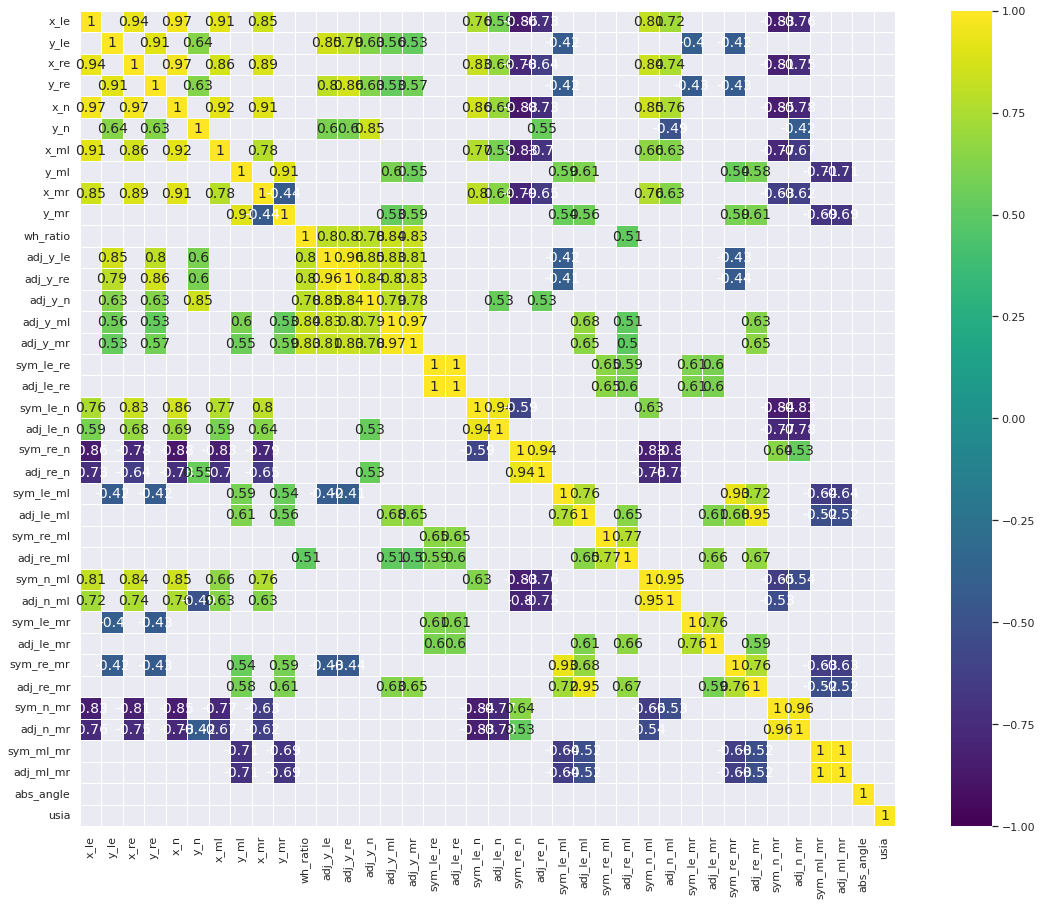

In [9]:
# HeatMap untuk menyelidiki korelasi antarvariabel train_new
corr = train_new.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=1,
            annot=True, annot_kws={"size": 14}, square=True);

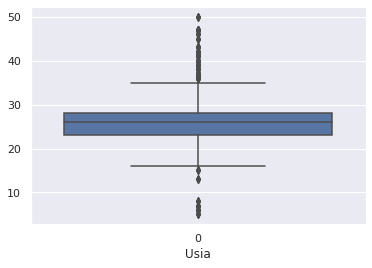

In [10]:
# BoxPlots Usia pada data train_new
p = sns.boxplot(data=train_new['usia'])
plt.xlabel('Usia')
plt.show()

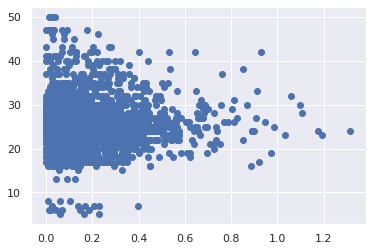

In [11]:
#hubungan antara angle foto dengan usia seseorang
plt.scatter(x = train_new['abs_angle'], y=train_new['usia'], marker='o');

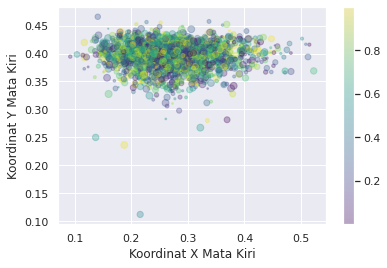

In [12]:
#Koordinat Mata Kiri
rng = np.random.RandomState(0)
x = train_new['x_le']
y = train_new['y_le']
colors = rng.rand(2305)
sizes = 50 * rng.rand(2305)

plt.xlabel('Koordinat X Mata Kiri')
plt.ylabel('Koordinat Y Mata Kiri')
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

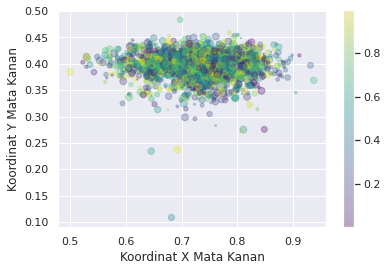

In [13]:
#Koordinat Mata Kanan
rng = np.random.RandomState(0)
x = train_new['x_re']
y = train_new['y_re']
colors = rng.rand(2305)
sizes = 50 * rng.rand(2305)

plt.xlabel('Koordinat X Mata Kanan')
plt.ylabel('Koordinat Y Mata Kanan')
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

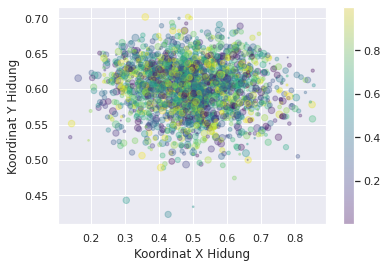

In [14]:
#Koordinat Hidung 
rng = np.random.RandomState(0)
x = train_new['x_n']
y = train_new['y_n']
colors = rng.rand(2305)
sizes = 50 * rng.rand(2305)

plt.xlabel('Koordinat X Hidung')
plt.ylabel('Koordinat Y Hidung')
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

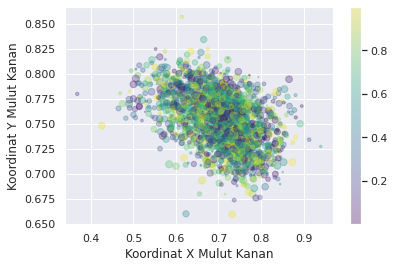

In [15]:
#Koordinat Mulut Kanan
rng = np.random.RandomState(0)
x = train_new['x_mr']
y = train_new['y_mr']
colors = rng.rand(2305)
sizes = 50 * rng.rand(2305)

plt.xlabel('Koordinat X Mulut Kanan')
plt.ylabel('Koordinat Y Mulut Kanan')
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

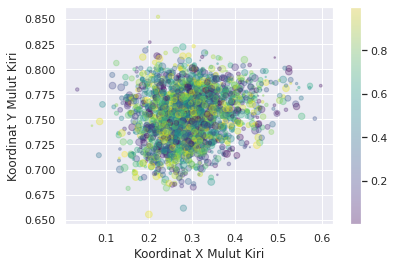

In [16]:
#Koordinat Mulut Kiri
rng = np.random.RandomState(0)
x = train_new['x_ml']
y = train_new['y_ml']
colors = rng.rand(2305)
sizes = 50 * rng.rand(2305)

plt.xlabel('Koordinat X Mulut Kiri')
plt.ylabel('Koordinat Y Mulut Kiri')
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale